# Preprocessing and Linear Regression model Notebook
- Coded By : <span style="color: red;">Eng.Ahmed Almohamdy</span>


# Importing


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', None)
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.shape

(1460, 81)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handle Null Values

In [5]:
del train_data['Id']

In [8]:
num_cols = list(train_data.describe().columns)
cat_cols = list(set(train_data.columns) - set(num_cols))
print('#Num_cols' , len(num_cols))
print('#Cat_cols' , len(cat_cols))

#Num_cols 37
#Cat_cols 43


- <b> featured to be removed ---> 80%  is nan 
- <b> featured to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [9]:
def view_null_count_features(train_data):
    null_count_df = pd.DataFrame(train_data.isna().sum()).rename(columns={0:'count'})
    null_count_df = null_count_df[null_count_df['count'] > 0].sort_values(by= 'count',ascending=False)
    display(null_count_df)
    
    check_80_percent = .8 * train_data.shape[0]
    check_3_percent = .03 * train_data.shape[0]
    
    f_to_be_removed = []
    f_to_be_filled = []
    obs_to_be_removed = []
    
    for col in null_count_df.index :
        if null_count_df.loc[col][0] >= check_80_percent :
            f_to_be_removed.append(col)
        elif (null_count_df.loc[col][0] < check_80_percent and null_count_df.loc[col][0] >= check_3_percent) :
            f_to_be_filled.append(col)
        else :
            obs_to_be_removed.append(col)
    
    print("#>>>f_to_be_removed:", f_to_be_removed)
    print("#>>>f_to_be_filled:", f_to_be_filled)
    print("#>>>obs_to_be_removed:", obs_to_be_removed)
    return f_to_be_removed , f_to_be_filled , obs_to_be_removed
    

    

In [10]:
f_to_be_removed , f_to_be_filled , obs_to_be_removed = view_null_count_features(train_data)

,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


#>>>f_to_be_removed: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
#>>>f_to_be_filled: ['MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
#>>>obs_to_be_removed: ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']


In [11]:
drop_null_inplace = True
# 1
train_data.drop(columns = f_to_be_removed , inplace= drop_null_inplace)

# 2
for col in f_to_be_filled :
    if col in num_cols:
        train_data[col].fillna(train_data[col].mean() , inplace= drop_null_inplace)
    elif col in cat_cols :
        train_data[col].fillna(train_data[col].mode()[0] , inplace= drop_null_inplace)

# 3
train_data.dropna(axis=0 , subset= obs_to_be_removed  , inplace= drop_null_inplace)


In [12]:
train_data.isna().sum().sum()

0

# Redundant Handling

In [13]:
num_cols = list(train_data.describe().columns)
cat_cols = list(set(train_data.columns) - set(num_cols) )

In [14]:
train_data.shape

(1412, 76)

### Automated function for both categorical and numircal data

In [15]:
def drop_redundant_coulmns(train_data):
    check_value = (80/100) * train_data.shape[0]
    droped_cols_dict = {}
    for col in train_data.columns:
        ma_x = train_data[col].value_counts().max()
        if ma_x >= check_value :
            droped_cols_dict[col] = ma_x
    return droped_cols_dict       
    
    
droped_cols_dict = drop_redundant_coulmns(train_data)
droped_cols_dict # show column and his max value redundant

{'Street': 1406,
 'LandContour': 1267,
 'Utilities': 1411,
 'LandSlope': 1335,
 'Condition1': 1220,
 'Condition2': 1397,
 'BldgType': 1189,
 'RoofMatl': 1387,
 'MasVnrType': 1269,
 'ExterCond': 1239,
 'BsmtCond': 1301,
 'BsmtFinType2': 1246,
 'BsmtFinSF2': 1246,
 'Heating': 1386,
 'CentralAir': 1331,
 'Electrical': 1300,
 'LowQualFinSF': 1387,
 'BsmtHalfBath': 1330,
 'KitchenAbvGr': 1361,
 'Functional': 1322,
 'GarageQual': 1344,
 'GarageCond': 1361,
 'PavedDrive': 1303,
 'EnclosedPorch': 1209,
 '3SsnPorch': 1389,
 'ScreenPorch': 1296,
 'PoolArea': 1405,
 'MiscVal': 1363,
 'SaleType': 1224,
 'SaleCondition': 1159}

In [16]:
droped_cols = list(droped_cols_dict.keys())
print('#drop',len(droped_cols))
droped_cols

#drop 30


['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'MasVnrType',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType',
 'SaleCondition']

In [17]:
train_data.drop(columns= droped_cols,inplace=True)

# Handling correlation between features

In [18]:
num_cols = list(train_data.describe().columns)
cat_cols = list(set(train_data.columns) - set(num_cols))

In [19]:
print('num_cols:',len(num_cols),' cat_cols:',len(cat_cols))

num_cols: 28  cat_cols: 18


In [20]:
corr_matrix = train_data[list(set(num_cols) - set(['SalePrice']))].corr()
corr_matrix

,2ndFlrSF,MoSold,MSSubClass,Fireplaces,MasVnrArea,FullBath,TotRmsAbvGrd,LotFrontage,BsmtFullBath,HalfBath,BsmtUnfSF,BsmtFinSF1,GarageCars,BedroomAbvGr,WoodDeckSF,TotalBsmtSF,GarageYrBlt,YrSold,LotArea,OverallCond,1stFlrSF,GarageArea,YearRemodAdd,YearBuilt,OpenPorchSF,OverallQual,GrLivArea
2ndFlrSF,1.000000,0.041707,0.306522,0.191156,0.170468,0.424132,0.624663,0.073486,-0.180286,0.612688,-0.005837,-0.146842,0.185609,0.504915,0.082770,-0.212704,0.059206,-0.033961,0.052246,0.022496,-0.198800,0.135449,0.131614,0.001651,0.206436,0.291858,0.691352
MoSold,0.041707,1.000000,-0.016463,0.048784,-0.009909,0.059877,0.037443,0.005484,-0.028996,-0.007592,0.031132,-0.020850,0.033566,0.051262,0.024436,0.002725,0.002400,-0.148464,0.001070,-0.008530,0.024335,0.020616,0.015944,0.008403,0.069473,0.064301,0.050364
MSSubClass,0.306522,-0.016463,1.000000,-0.040128,0.023024,0.121525,0.030657,-0.360014,0.007005,0.181273,-0.139572,-0.067783,-0.034897,-0.031432,-0.014568,-0.253332,0.077805,-0.026526,-0.138298,-0.063240,-0.254277,-0.094523,0.043906,0.032256,-0.005684,0.038952,0.073167
Fireplaces,0.191156,0.048784,-0.040128,1.000000,0.241914,0.246986,0.324268,0.235190,0.125861,0.198347,0.034840,0.250394,0.300632,0.099368,0.194283,0.336714,0.039011,-0.020645,0.268960,-0.030047,0.409462,0.264652,0.100277,0.143433,0.165487,0.392978,0.456052
MasVnrArea,0.170468,-0.009909,0.023024,0.241914,1.000000,0.277278,0.283266,0.179330,0.077607,0.197999,0.103094,0.259291,0.363992,0.101925,0.157566,0.371677,0.247561,-0.005249,0.104010,-0.134961,0.348471,0.370982,0.172112,0.311745,0.124018,0.409656,0.389884
FullBath,0.424132,0.059877,0.121525,0.246986,0.277278,1.000000,0.555163,0.182111,-0.066601,0.142059,0.301666,0.060432,0.477142,0.360585,0.195331,0.362967,0.470524,-0.026478,0.124752,-0.190209,0.383370,0.412022,0.454840,0.474767,0.267207,0.576543,0.632736
TotRmsAbvGrd,0.624663,0.037443,0.030657,0.324268,0.283266,0.555163,1.000000,0.323671,-0.057328,0.352956,0.258237,0.043425,0.364135,0.669181,0.164481,0.313035,0.141825,-0.047586,0.189107,-0.058852,0.404941,0.341006,0.189216,0.091792,0.243512,0.438254,0.827693
LotFrontage,0.073486,0.005484,-0.360014,0.235190,0.179330,0.182111,0.323671,1.000000,0.089212,0.046548,0.116354,0.215487,0.269574,0.240053,0.075353,0.384911,0.061672,0.006464,0.305272,-0.054635,0.416546,0.324954,0.078828,0.114914,0.134402,0.232351,0.369118
BsmtFullBath,-0.180286,-0.028996,0.007005,0.125861,0.077607,-0.066601,-0.057328,0.089212,1.000000,-0.048553,-0.466741,0.639301,0.122583,-0.155780,0.167384,0.276712,0.111539,0.071713,0.157024,-0.064559,0.243480,0.169651,0.103877,0.179642,0.055204,0.082932,0.023633
HalfBath,0.612688,-0.007592,0.181273,0.198347,0.197999,0.142059,0.352956,0.046548,-0.048553,1.000000,-0.065741,-0.015215,0.214780,0.235889,0.096899,-0.102622,0.182232,-0.005113,0.013808,-0.072977,-0.123112,0.156993,0.168525,0.233529,0.190067,0.256616,0.416331


#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable)

In [21]:
def drop_correlated_columns(corr_matrix):
    droped_cols = []
    for row in range(corr_matrix.shape[1]):
        for column in range(row+1 , corr_matrix.shape[1] ):
            if np.abs(corr_matrix.values[row , column]) >= .7 :
                row_with_response = np.corrcoef(train_data['SalePrice'],
                                                train_data[corr_matrix.index[row]])[0,1]
                
                col_with_response = np.corrcoef(train_data['SalePrice'],
                                                train_data[corr_matrix.columns[column]])[0,1]
                
                
                if np.abs(row_with_response) >= np.abs(col_with_response):
                    droped_cols.append(corr_matrix.columns[column])
                else :
                    droped_cols.append(corr_matrix.index[row])
                    
    return droped_cols                    
         
    

corr_droped_cols = list(set(drop_correlated_columns(corr_matrix))) # set then list to remove repeated cols
print(f'the columns are droped are  {corr_droped_cols}')


the columns are droped are  ['TotalBsmtSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']


In [22]:
train_data.drop(columns=corr_droped_cols,inplace=True)

# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [23]:
num_cols = list((train_data.describe().columns))
cat_cols = list(set(train_data.columns) - set(num_cols) )

In [24]:
def outliers_clamping(train_data , num_cols):
    for col in num_cols:
    
        Q1 = np.quantile(train_data[col] , .25)
        Q3 = np.quantile(train_data[col] , .75)

        IQR = Q3 - Q1

        Upper_Bound = Q3 + 1.5*IQR
        Lower_Bound = Q1 - 1.5*IQR

        indxs = train_data[train_data[col] > Upper_Bound].index 
        train_data.loc[indxs , col] = Upper_Bound
        
        indxs = train_data[train_data[col] < Lower_Bound].index 
        train_data.loc[indxs , col] = Lower_Bound
    
   
outliers_clamping(train_data, num_cols)


# def outliers_clamping(col , value):
    
#     Q1 = np.quantile(train_data[col] , .25)
#     Q3 = np.quantile(train_data[col] , .75)
    
#     IQR = Q3 - Q1
    
#     Upper_Bound = Q3 + 1.5*IQR
#     Lower_Bound = Q1 - 1.5*IQR
    
#     if value > Upper_Bound:
#         return Upper_Bound
#     elif value < Lower_Bound:
#         return Lower_Bound
#     else:
#         return value
  

# for col in num_cols:
#   train_data[col] = train_data[col].apply(lambda x: outliers_clamping(col, x))




# Skewness Handling
- skewness = sum(x-x^)^3/((segma^2)(N-1)) 
> x-x^ first then  ^3  then sum


In [25]:
def calc_skewness(train_data , num_cols):
    N = train_data.shape[0]
    
    skewness_dic ={}
    
    for col in num_cols:
        skewness =np.sum((train_data[col] - np.mean(train_data[col]))**3) / ((N-1) * (np.std(train_data[col])**3))
        skewness_dic[col] = skewness
    
    return skewness_dic 
        
    
skewness_dic = calc_skewness(train_data , num_cols)
skewness_dic

{'MSSubClass': 1.0358635698150689,
 'LotFrontage': 0.04926473428184817,
 'LotArea': 0.19221921445385495,
 'OverallQual': 0.27433619617638766,
 'OverallCond': 0.5903176441112575,
 'YearBuilt': -0.6147421936679174,
 'YearRemodAdd': -0.5293212225536039,
 'MasVnrArea': 1.2812363294500924,
 'BsmtFinSF1': 0.7201693820024557,
 'BsmtUnfSF': 0.7870289079627938,
 '1stFlrSF': 0.6725397428198542,
 '2ndFlrSF': 0.7822275341762273,
 'GrLivArea': 0.6071392877243883,
 'BsmtFullBath': 0.5294842298216864,
 'FullBath': 0.041076607240591034,
 'HalfBath': 0.6445981017873323,
 'BedroomAbvGr': -0.2714663663793416,
 'Fireplaces': 0.5639859831747243,
 'GarageCars': -0.367425243055428,
 'WoodDeckSF': 1.0565560051953393,
 'OpenPorchSF': 1.1380001263188886,
 'MoSold': 0.2095924614373496,
 'YrSold': 0.10663387938167278,
 'SalePrice': 0.8044205018717858}

In [26]:
def log_transform(train_data , skewness_dic):
    print('Features is log_Transformed : ')
    for key , value in skewness_dic.items():
        if np.abs(value) > 1:
            train_data[key] = np.log1p(np.abs( train_data[key]))
            print(key)

      


In [27]:
log_transform(train_data , skewness_dic)

Features is log_Transformed : 
MSSubClass
MasVnrArea
WoodDeckSF
OpenPorchSF


# Feature Scaling
- standardization : use with normally feature
- min-max scaling : use with any another distribution but i should handle outliers 

##### How can i know if feature is normally or not 
using two method 
- QQ plot
- shapiro-wilk test  (most use)

In [28]:
len(num_cols)

24

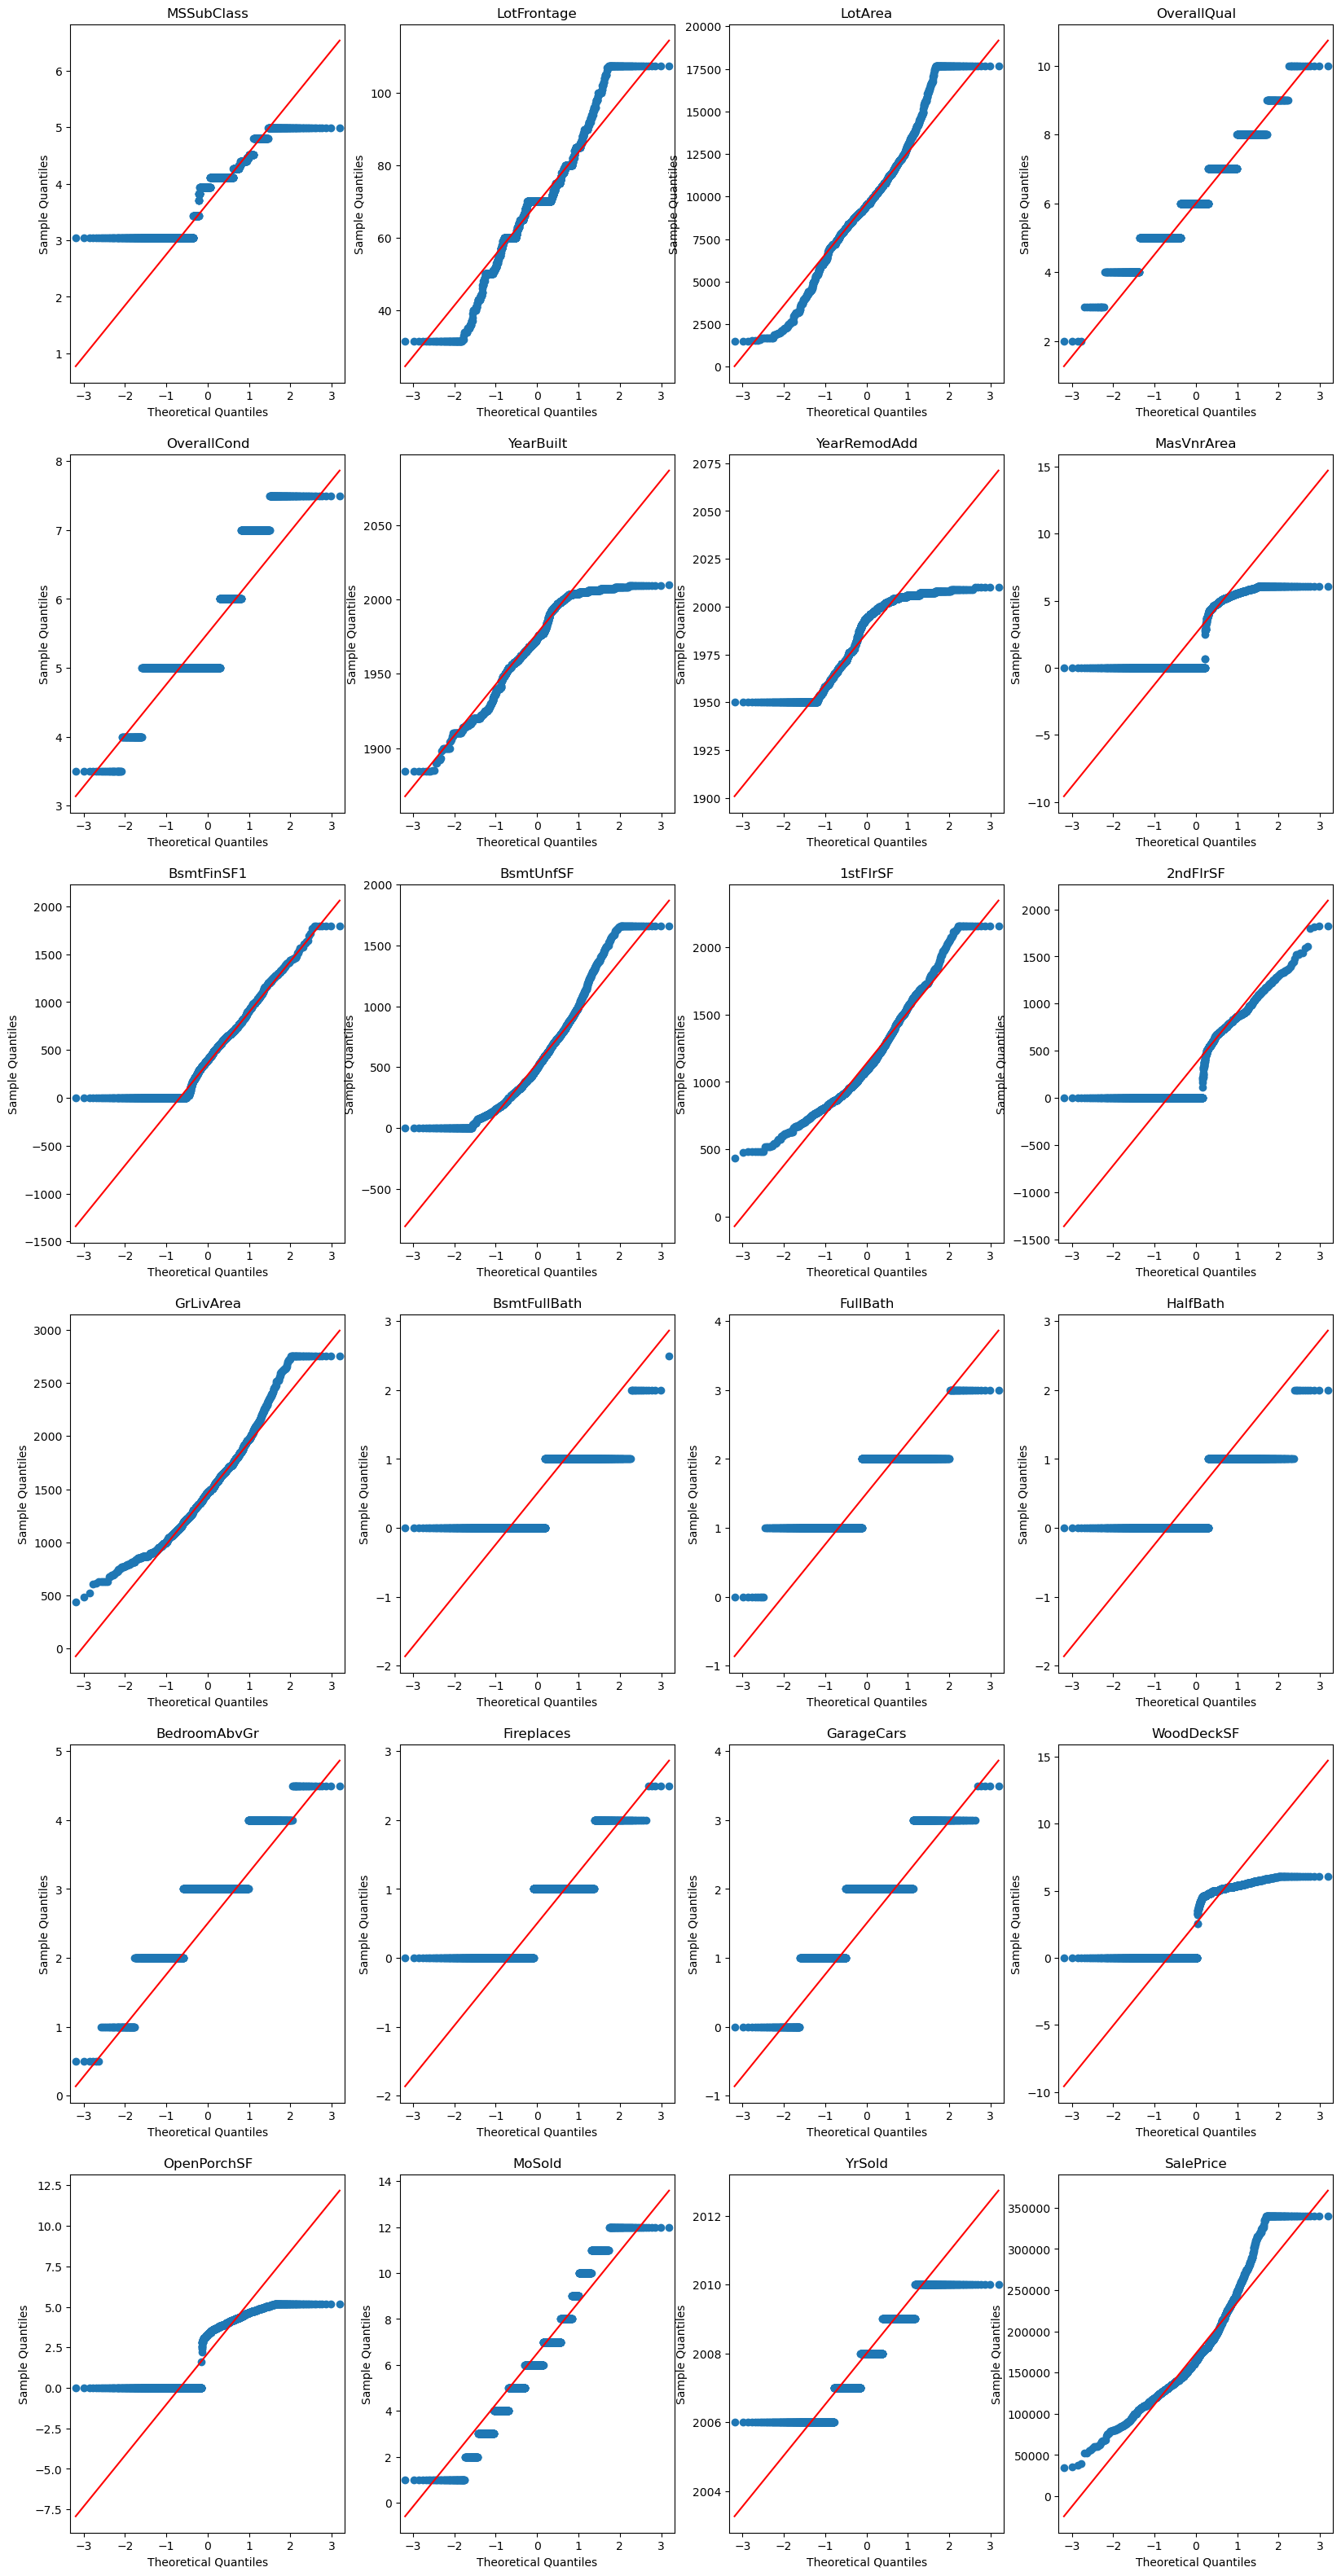

In [29]:
#QQ plot
import statsmodels.api as sm
ncols = 4
nrows=6
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
ax = ax.flatten()
i=0
for col in num_cols:
    sm.qqplot(train_data[col],fit = False, line='q', ax = ax[i])
    ax[i].set_title(col)
    i+=1


plt.show()

#### shapiro-wilk test
- Testing the normally distributed features using Shapiro-Wilk test the null hypothesis here is     that the data follows a normal distribution we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%) and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha


In [30]:
feats_std_scale = []
feats_min_max_scale = []
from scipy.stats import shapiro
for col in num_cols:
    w_stat, p = shapiro(train_data[col])
    

    alpha = 1.76e-20
    if p > alpha:
        print(f'{col} looks like gaussian (####-> fail to reject H0 👌)')
        print('W_Statistic=%.3f, p=%.8f \n' % (w_stat, p))
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        print('W_Statistic=%.3f, p=%.18f \n' % (w_stat, p))
        feats_min_max_scale.append(col)

MSSubClass does not look Gaussian (reject H0)
W_Statistic=0.858, p=0.000000000000000000 

LotFrontage looks like gaussian (####-> fail to reject H0 👌)
W_Statistic=0.967, p=0.00000000 

LotArea looks like gaussian (####-> fail to reject H0 👌)
W_Statistic=0.979, p=0.00000000 

OverallQual does not look Gaussian (reject H0)
W_Statistic=0.945, p=0.000000000000000000 

OverallCond does not look Gaussian (reject H0)
W_Statistic=0.816, p=0.000000000000000000 

YearBuilt does not look Gaussian (reject H0)
W_Statistic=0.922, p=0.000000000000000000 

YearRemodAdd does not look Gaussian (reject H0)
W_Statistic=0.864, p=0.000000000000000000 

MasVnrArea does not look Gaussian (reject H0)
W_Statistic=0.694, p=0.000000000000000000 

BsmtFinSF1 does not look Gaussian (reject H0)
W_Statistic=0.894, p=0.000000000000000000 

BsmtUnfSF does not look Gaussian (reject H0)
W_Statistic=0.934, p=0.000000000000000000 

1stFlrSF looks like gaussian (####-> fail to reject H0 👌)
W_Statistic=0.959, p=0.00000000 



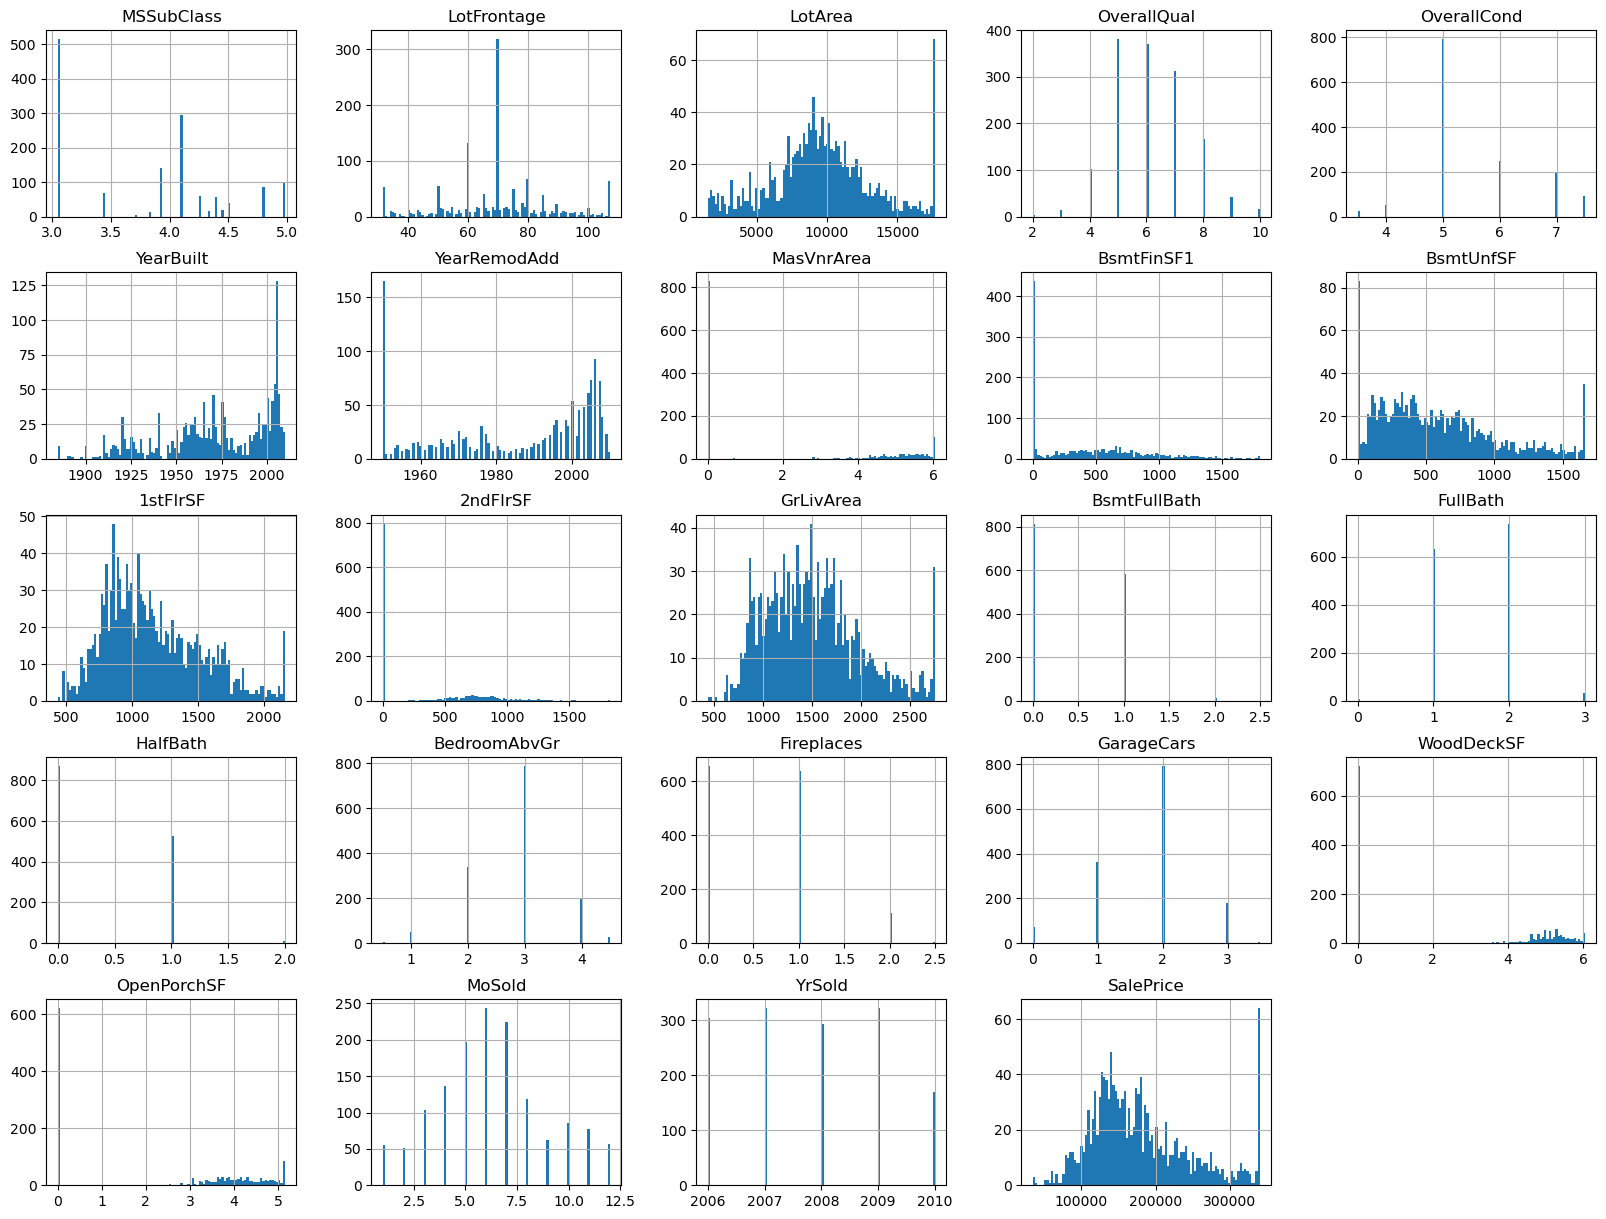

In [31]:
train_data[num_cols].hist(bins = 100, figsize = (20, 15));

# Handling categorical features 

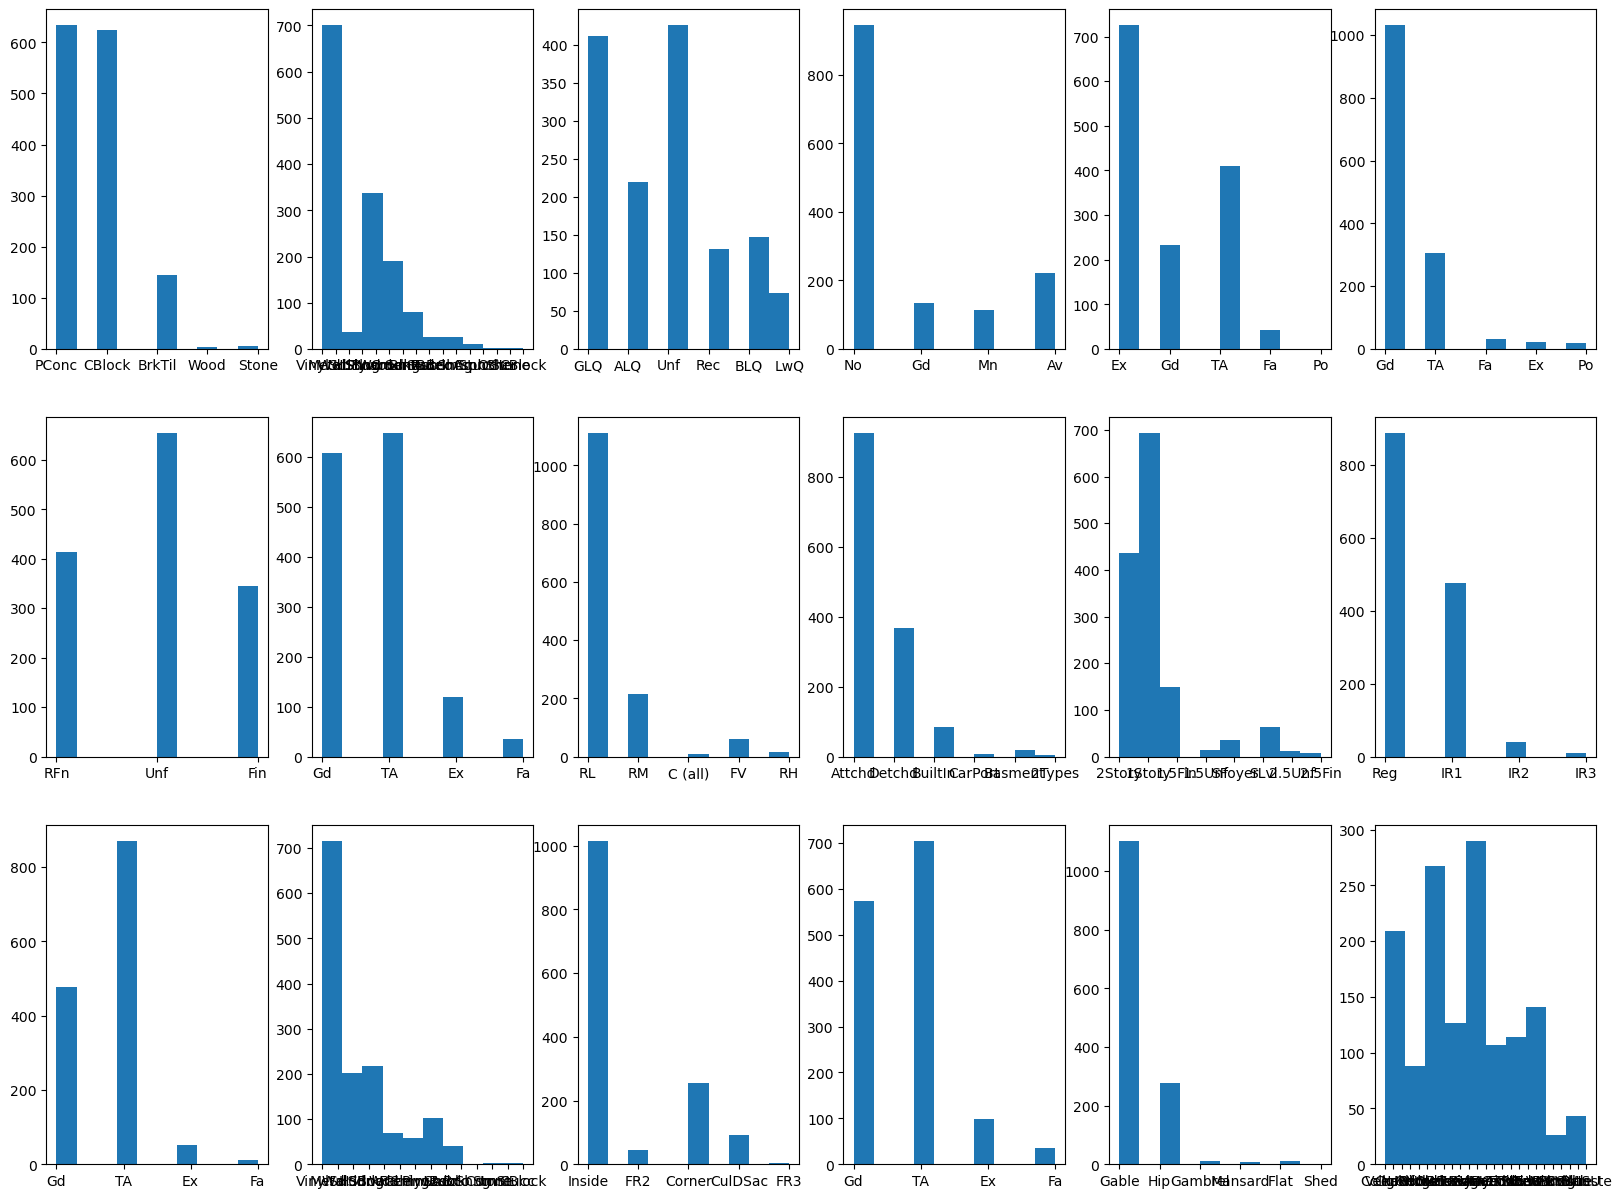

In [32]:
fig , ax = plt.subplots(nrows=3 , ncols=6 ,figsize=(20,15) )
ax = ax.flatten()
j=0
for col in cat_cols:
    ax[j].hist(train_data[col])
    j+=1

In [33]:
print(cat_cols)

['Foundation', 'Exterior2nd', 'BsmtFinType1', 'BsmtExposure', 'HeatingQC', 'FireplaceQu', 'GarageFinish', 'BsmtQual', 'MSZoning', 'GarageType', 'HouseStyle', 'LotShape', 'ExterQual', 'Exterior1st', 'LotConfig', 'KitchenQual', 'RoofStyle', 'Neighborhood']


In [34]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for col in ordinal_cats:
  train_data[col] = LabelEncoder().fit_transform(train_data[col])
   
#-----------------------------------------------------------------------------------------
one_hot_enc_model = OneHotEncoder(sparse_output = False)
one_hot_data = one_hot_enc_model.fit_transform(train_data[nominal_cats])

list_of_arrays = one_hot_enc_model.categories_
col_names= [item for array in list_of_arrays for item in array]


nominal_train_df = pd.DataFrame(data= one_hot_data, columns = col_names)

##### Merging all data

In [36]:
train_data.reset_index(drop=True,inplace=True)
train_data.drop(columns=nominal_cats , inplace=True)

In [37]:
train_data = pd.concat((train_data , nominal_train_df) , axis=1)

In [38]:
train_data.shape

(1412, 127)

#### Spliting Data

In [39]:
data_y = train_data[['SalePrice']]
data_x = train_data[list(set(train_data.columns) - set(['SalePrice']))]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.25, random_state=42)

In [41]:
feats_min_max_scale.remove('SalePrice')
print('feats_std_scale : ',feats_std_scale) 
print('feats_min_max_scale : ',feats_min_max_scale) 

feats_std_scale :  ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'MoSold']
feats_min_max_scale :  ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'YrSold']


#### Feature Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler_x = MinMaxScaler()
x_train[feats_min_max_scale] = min_max_scaler_x.fit_transform(x_train[feats_min_max_scale])
x_val[feats_min_max_scale] = min_max_scaler_x.transform(x_val[feats_min_max_scale])

min_max_scaler_y = MinMaxScaler()
y_train = pd.DataFrame(min_max_scaler_y.fit_transform(y_train))
y_val = pd.DataFrame(min_max_scaler_y.transform(y_val))

std_scaler_x = StandardScaler()
x_train[feats_std_scale] = std_scaler_x.fit_transform(x_train[feats_std_scale])
x_val[feats_std_scale] = std_scaler_x.transform(x_val[feats_std_scale])




### Implementing model